Skipping file hourly_mean_temperature.csv as it does not contain all required columns.
Skipping file mean_days_trends_by_station_hour.csv as it does not contain all required columns.
Skipping file mean_hours_trends_by_station_hour.csv as it does not contain all required columns.
Skipping file mean_minutes_trends_by_station_hour.csv as it does not contain all required columns.
Skipping file mean_temperatures.csv as it does not contain all required columns.
Skipping file mean_trends_by_station_hour.csv as it does not contain all required columns.
Skipping file new_hourly_trends_new_code.csv as it does not contain all required columns.
Skipping file station_slopes.csv as it does not contain all required columns.
Skipping file station_slopes_new.csv as it does not contain all required columns.
The mean temperature data has been saved to "hourly_mean_temperature.csv".


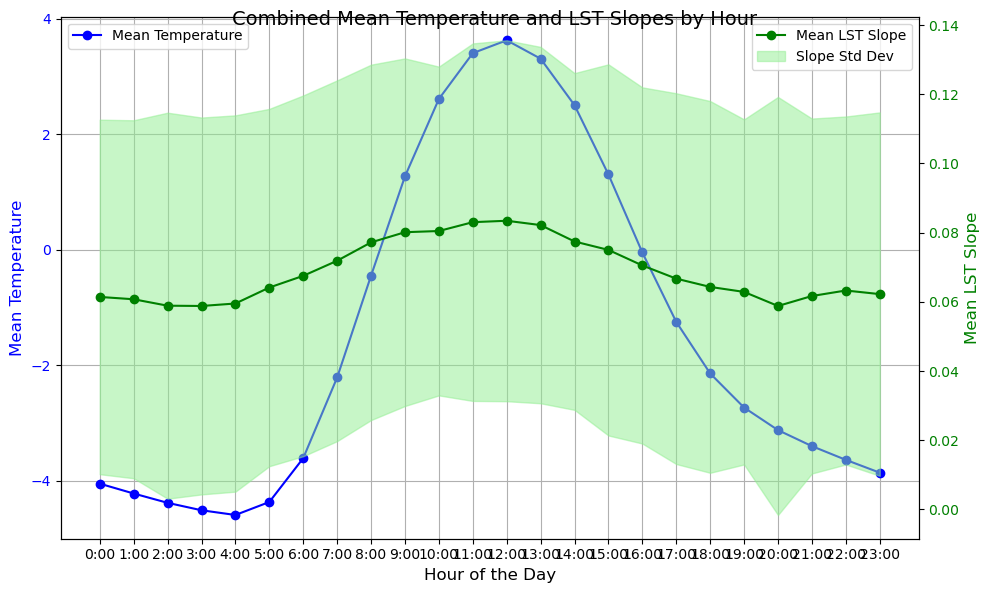

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Code 1: Mean Temperature by Hour ===

# Path to the folder containing the CSV files
folder_path = 'E:/all folders/STUDIES/UZH/master thesis/IMIS data/new data/new processed data/TSS_30MIN_MEAN_files/Stations covering 2000till 2023'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Required columns
required_columns = {'year', 'month', 'day', 'time', 'TSS_30MIN_MEAN'}

# Loop through each CSV file
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Check if all required columns are present
        if required_columns.issubset(df.columns):
            # Combine year, month, day, and time into a single datetime column
            df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'time']].astype(str).agg('-'.join, axis=1))
            
            # Extract the hour from the datetime column
            df['hour'] = df['datetime'].dt.hour
            
            # Append the DataFrame to the list
            dataframes.append(df[['hour', 'TSS_30MIN_MEAN']])
        else:
            print(f"Skipping file {file} as it does not contain all required columns.")
    
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Check if any DataFrames were collected
if dataframes:
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Group by hour and calculate the mean temperature
    hourly_mean_df = combined_df.groupby('hour')['TSS_30MIN_MEAN'].mean().reset_index()
    
    # Rename the columns for clarity
    hourly_mean_df.columns = ['Hour', 'Mean_Temperature']
    
    # Save the resulting DataFrame to a new CSV file
    hourly_mean_df.to_csv('hourly_mean_temperature.csv', index=False)
    
    print('The mean temperature data has been saved to "hourly_mean_temperature.csv".')
else:
    print('No valid data files found.')

# === Code 2: Mean and Std Dev of IMIS Slopes ===

# Read the CSV file for slopes
file_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\new_hourly_trends_new_code.csv'
data = pd.read_csv(file_path)

# Exclude the last column
data_trimmed = data.iloc[:, :-1]

# Extract the time data from the header (excluding the first column)
time_data = data_trimmed.columns[1:]

# Filter time data to include only full hours (e.g., '00:00', '01:00', etc.)
# Assuming time_data format is HH:MM, keep only times where MM == '00'
time_data = [time for time in time_data if time.endswith(':00')]

# Locate the row containing the mean values
mean_row = data_trimmed[data_trimmed.iloc[:, 0] == "MEAN2"]

# Locate the row containing the standard deviation values
stdev_row = data_trimmed[data_trimmed.iloc[:, 0] == "stdev2"]

# === Adjust mean and standard deviation values to match filtered time_data ===
mean_values = mean_row.iloc[:, 1:].squeeze() if not mean_row.empty else None
stdev_values = stdev_row.iloc[:, 1:].squeeze() if not stdev_row.empty else None

# Filter the mean and standard deviation values for full-hour times
mean_values = mean_values[::2]  # Assuming half-hour intervals, take every second value
stdev_values = stdev_values[::2]  # Take every second value

# === Create a combined plot ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# === Plot 1: Mean Temperature by Hour on ax1 ===
ax1.plot(hourly_mean_df['Hour'], hourly_mean_df['Mean_Temperature'], marker='o', linestyle='-', color='b', label='Mean Temperature')
ax1.set_xlabel('Hour of the Day', fontsize=12)
ax1.set_ylabel('Mean Temperature', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# === Plot 2: Mean and Std Dev of IMIS Slopes on ax2 (secondary y-axis) ===
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
if mean_values is not None and stdev_values is not None:
    ax2.plot(time_data, mean_values, marker='o', linestyle='-', color='g', label='Mean LST Slope')
    ax2.fill_between(time_data, mean_values - stdev_values, mean_values + stdev_values, color='lightgreen', alpha=0.5, label='Slope Std Dev')
    ax2.set_ylabel('Mean LST Slope', fontsize=12, color='g')
    ax2.tick_params(axis='y', labelcolor='g')

# === Final layout adjustments and legends ===
fig.tight_layout()
fig.suptitle('Combined Mean Temperature and LST Slopes by Hour', fontsize=14)

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


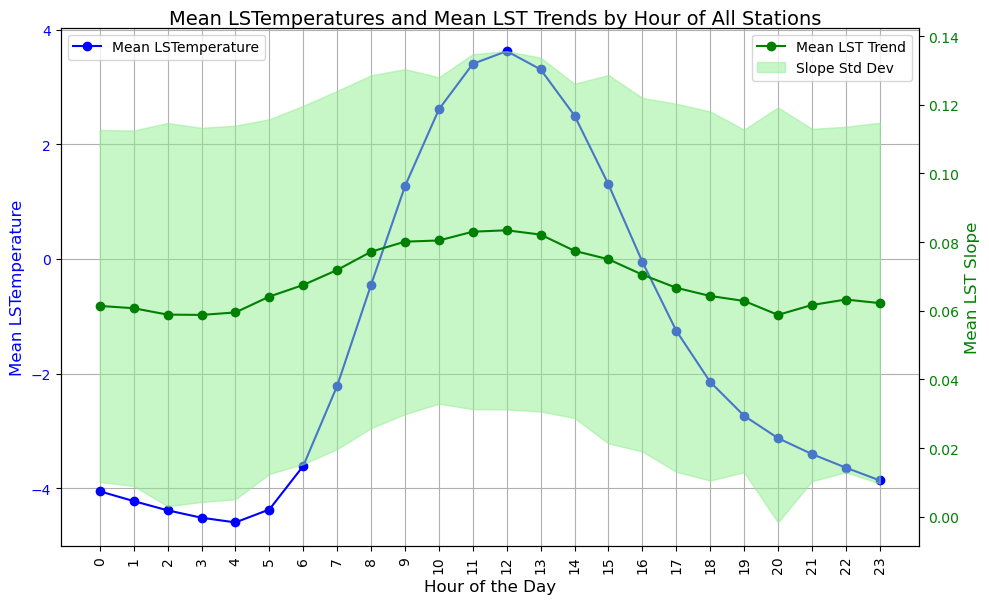

In [2]:
# === Create a combined plot ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# === Plot 1: Mean Temperature by Hour on ax1 ===
ax1.plot(hourly_mean_df['Hour'], hourly_mean_df['Mean_Temperature'], marker='o', linestyle='-', color='b', label='Mean LSTemperature')
ax1.set_xlabel('Hour of the Day', fontsize=12)
ax1.set_ylabel('Mean LSTemperature', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# === Plot 2: Mean and Std Dev of IMIS Slopes on ax2 (secondary y-axis) ===
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
if mean_values is not None and stdev_values is not None:
    ax2.plot(time_data, mean_values, marker='o', linestyle='-', color='g', label='Mean LST Trend')
    ax2.fill_between(time_data, mean_values - stdev_values, mean_values + stdev_values, color='lightgreen', alpha=0.5, label='Slope Std Dev')
    ax2.set_ylabel('Mean LST Slope', fontsize=12, color='g')
    ax2.tick_params(axis='y', labelcolor='g')

# === Rotate X-axis Labels (ensured rotation using set_xticklabels) ===
ax1.set_xticks(hourly_mean_df['Hour'])
ax1.set_xticklabels(hourly_mean_df['Hour'], rotation=90)

# === Final layout adjustments ===
fig.tight_layout()

# Adjust title position
fig.suptitle('Mean LSTemperatures and Mean LST Trends by Hour of All Stations', fontsize=14, y=1)

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

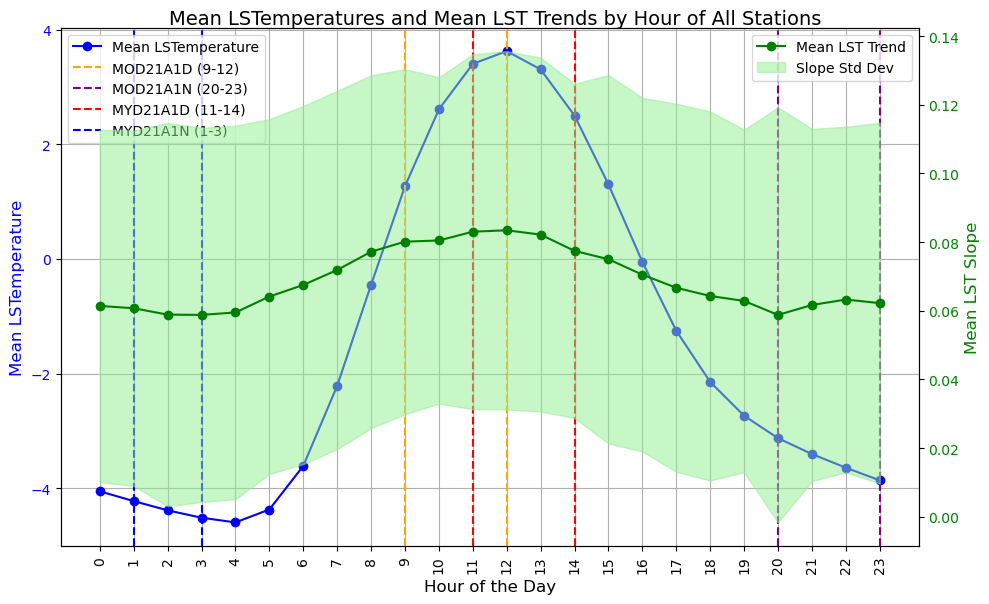

In [5]:
import matplotlib.pyplot as plt

# === Create a combined plot ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# === Plot 1: Mean Temperature by Hour on ax1 ===
ax1.plot(hourly_mean_df['Hour'], hourly_mean_df['Mean_Temperature'], marker='o', linestyle='-', color='b', label='Mean LSTemperature')
ax1.set_xlabel('Hour of the Day', fontsize=12)
ax1.set_ylabel('Mean LSTemperature', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# === Plot 2: Mean and Std Dev of IMIS Slopes on ax2 (secondary y-axis) ===
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
if mean_values is not None and stdev_values is not None:
    ax2.plot(time_data, mean_values, marker='o', linestyle='-', color='g', label='Mean LST Trend')
    ax2.fill_between(time_data, mean_values - stdev_values, mean_values + stdev_values, color='lightgreen', alpha=0.5, label='Slope Std Dev')
    ax2.set_ylabel('Mean LST Slope', fontsize=12, color='g')
    ax2.tick_params(axis='y', labelcolor='g')

# === Rotate X-axis Labels (ensured rotation using set_xticklabels) ===
ax1.set_xticks(hourly_mean_df['Hour'])
ax1.set_xticklabels(hourly_mean_df['Hour'], rotation=90)

# === Mark dataset times with vertical lines ===
# MOD21A1D (9-12)
ax1.axvline(x=9, color='orange', linestyle='--', label='MOD21A1D (9-12)')
ax1.axvline(x=12, color='orange', linestyle='--')

# MOD21A1N (20-23)
ax1.axvline(x=20, color='purple', linestyle='--', label='MOD21A1N (20-23)')
ax1.axvline(x=23, color='purple', linestyle='--')

# MYD21A1D (11-14)
ax1.axvline(x=11, color='red', linestyle='--', label='MYD21A1D (11-14)')
ax1.axvline(x=14, color='red', linestyle='--')

# MYD21A1N (1-3)
ax1.axvline(x=1, color='blue', linestyle='--', label='MYD21A1N (1-3)')
ax1.axvline(x=3, color='blue', linestyle='--')

# === Final layout adjustments ===
fig.tight_layout()

# Adjust title position
fig.suptitle('Mean LSTemperatures and Mean LST Trends by Hour of All Stations', fontsize=14, y=1)

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
